# K-Nearest Neighbors (KNN) Nonparametric Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.figsize'] = (8, 5)
%config InlineBackend.figure_format = 'retina'

Some imagess from **An Introduction to Statistical Learning**
available at https://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf

K-Nearest Neighbors (KNN) regression

Model prediction is the mean of the K nearest data points.

![](images/knn-vs-line.png)

KNN can be used to model any kind of relation.

![](images/knn-curve.png)

Consider data with multiple features.

True relationship (blue) and linear model (yellow).

![](images/ols-surface.png)

KNN models for multiple features.

![](images/knn-surface.png)

# Diabetes dataset

In [5]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [6]:
# features (X) are already mean subtracted and normalized
X = diabetes.data
# target disease progression values are NOT mean subtraced or normalized
y = diabetes.target

X.shape, y.shape

((442, 10), (442,))

In [7]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Fit the diabetes dataset using a KNN model with K=3

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [10]:
knn3 = KNeighborsRegressor(n_neighbors=3)

knn3.fit(X, y);

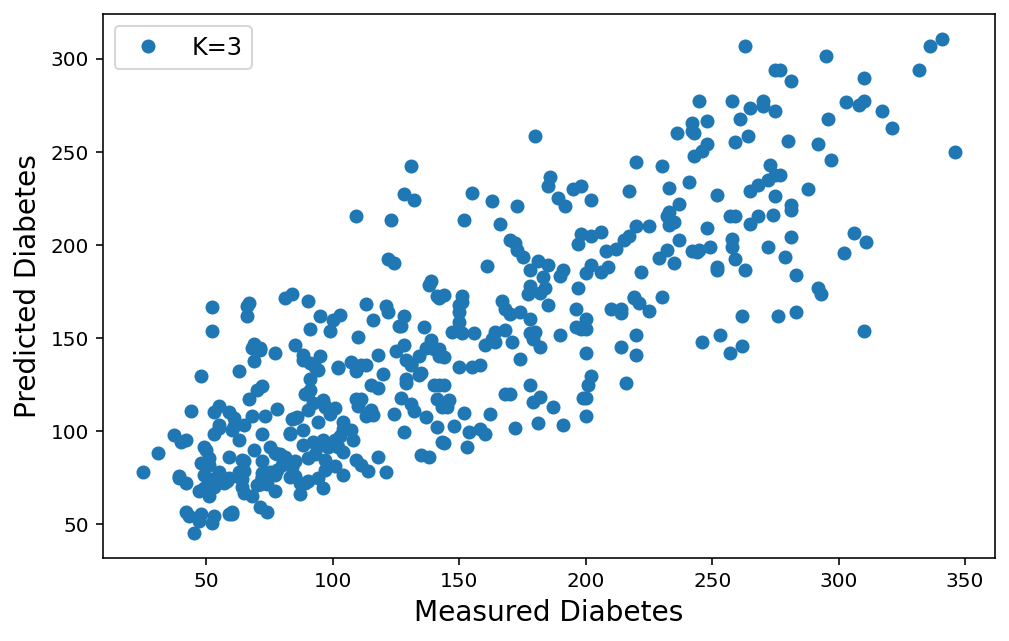

In [11]:
plt.plot(y, knn3.predict(X), 'o', label='K=3')
plt.xlabel('Measured Diabetes')
plt.ylabel('Predicted Diabetes')
plt.legend();

But how many neighbors should we consider? i.e. K = ?

K is a hyperparameter that defines one of many possible KNN models.

How do you determine an appropriate value for a hyperparameter so as to avoid both underfitting (high bias) and overfitting (high variance) your data?

Cross validation.

Split dataset into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

Use 10-fold cross validation on the training set to determine the optimal number of nearest neighbors K to consider in the model.

In [14]:
from sklearn.model_selection import GridSearchCV

allK = np.arange(1, 101)
params = {'n_neighbors': allK}
knn = KNeighborsRegressor()
cv = GridSearchCV(knn, params, cv=10, scoring='neg_mean_squared_error')
cv.fit(X_train, y_train)
K = cv.best_params_['n_neighbors']
K

17

Visualize cross validated results for all tested values of K.

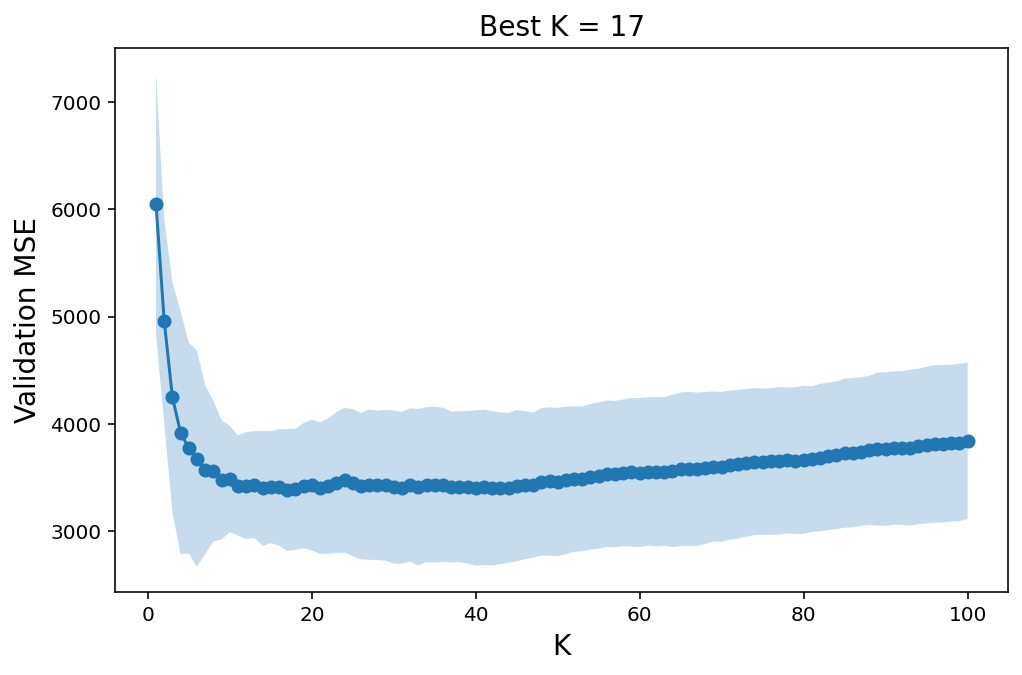

In [17]:
cv_mse_mean = -cv.cv_results_['mean_test_score']
cv_mse_std = cv.cv_results_['std_test_score']

plt.plot(allK, cv_mse_mean, 'o-')
plt.fill_between(allK, cv_mse_mean - cv_mse_std, cv_mse_mean + cv_mse_std, alpha=0.25)
plt.xlabel('K')
plt.ylabel('Validation MSE')
plt.title(f"Best K = {K}");

Fit the entire training set using the model with the chosen number of nearest neighbors K.

In [21]:
knn = KNeighborsRegressor(n_neighbors=K)

knn.fit(X_train, y_train);

Evaluate the model's performance by its ability to describe the testing set on which it was not trained.

In [19]:
residuals = y_test - knn.predict(X_test)

mse = np.mean(residuals**2)
mse

2959.4188152040997

The above mean squared error could be used to compare the KNN model to other model's we may wish to explore.

Train your final model on all availabl data.

In [20]:
final_model = KNeighborsRegressor(n_neighbors=K)

final_model.fit(X, y);

Compare to K=1 and K=3

In [22]:
# to compare apples to apples, we neet to train all models on the training set only.
knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X_train, y_train)

knn3 = KNeighborsRegressor(n_neighbors=3)
knn3.fit(X_train, y_train)

final_model.fit(X_train, y_train);  # best K

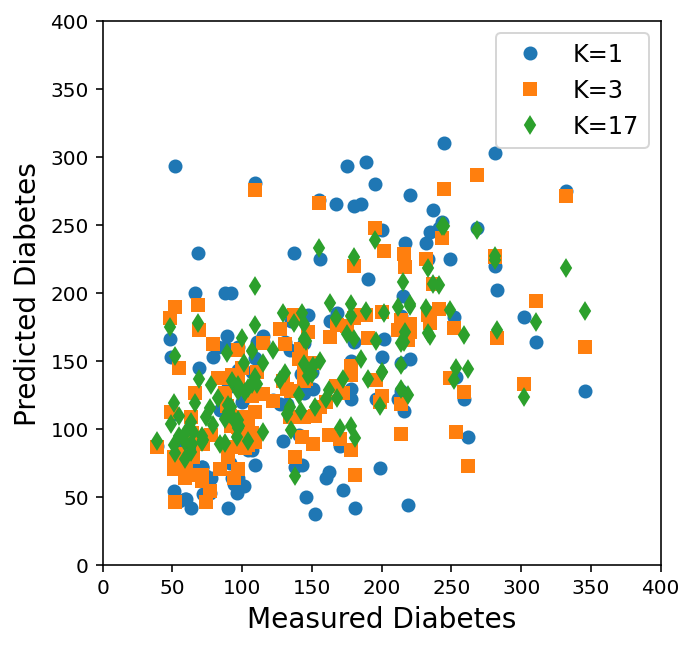

In [23]:
plt.figure(figsize=(5,5))
plt.plot(y_test, knn1.predict(X_test), 'o', label='K=1')
plt.plot(y_test, knn3.predict(X_test), 's', label='K=3')
plt.plot(y_test, final_model.predict(X_test), 'd', label=f'K={K}')
plt.xlim([0, 400]);
plt.ylim([0, 400]);
plt.xlabel('Measured Diabetes')
plt.ylabel('Predicted Diabetes')
plt.legend();